# <a href="https://thetahat.ru/courses/ph-ds-2024-aut">Phystech@DataScience</a>
## Семинар 9

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

In [25]:
# Bot check

# HW_ID: phds_sem9
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import GridSearchCV

sns.set_theme(style='white', font_scale=1.4)

## Cнижение размерностей



---
### Задача 1

В этой задаче мы попробуем применить PCA-разложение для уменьшения размерности данных в задаче классификации. Во многих случаях такая процедура позволяет выделить значимую информацию из датасета при незначительных потерях качества. А в лучшем случае мы избавимся от шумовых признаков и увеличим результат.

Будем использовать простой датасет для задачи классификации вин трех разных видов. На практике вам могут встретиться намного более объемные данные, которые имеют большую размерность (представьте, например, что вы закодировали большое число категориальных признаков с помощью one-hot).

Загрузим данные:

In [27]:
data = load_wine()
X, y = data['data'], data['target']

Посмотрим на описание:

In [28]:
print(data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

Разделим данные на обучающую и тестовую выборки.

Для того, чтобы сохранить пропорции каждого класса, используем аргумент `stratify`.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

Выполните стандартизацию данных. Объясните, почему она необходима в этом случае.

**Ответ:** pca работает с метриками, поэтому лучше все стандартизировать

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Визуализируйте проекцию выборки на первые две компоненты. Являются ли классы линейно разделимыми?

In [31]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

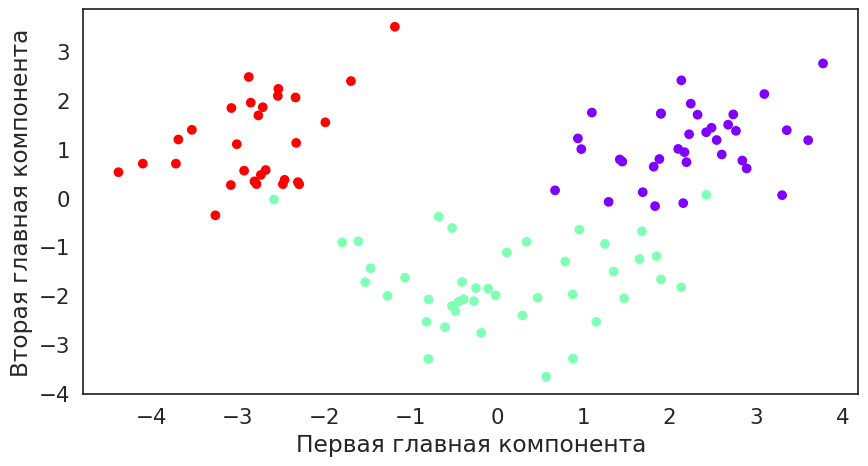

In [32]:
plt.figure(figsize=(10, 5))
plt.scatter(x=X_train_pca[:, 0], y=X_train_pca[:, 1], c=y_train, cmap='rainbow')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента');

**Ответ:** да, они линейно разделимы, между каждой парой классов можно провести разделяющую гиперплоскость (прямую)

Постройте график зависимости качества логистической регрессии на тестовой выборке от числа компонент. Что можно наблюдать?

In [33]:
X_train.shape[1]

13

[0.8611111111111112, 0.9305555555555556, 0.9583333333333334, 1.0, 1.0, 0.9722222222222222, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9722222222222222, 0.9583333333333334, 0.9861111111111112]


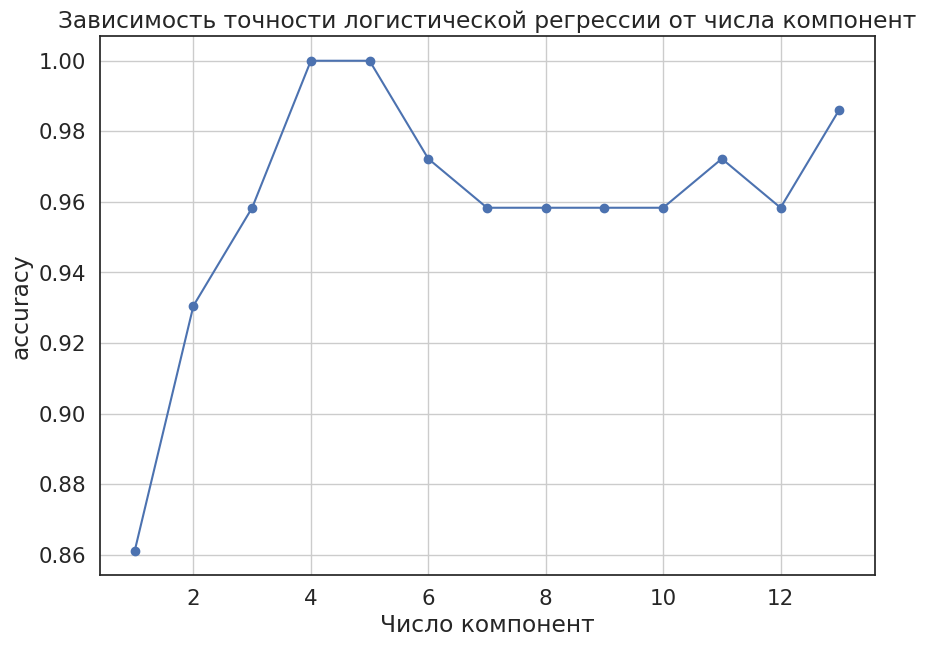

In [34]:
accuracies = []

for n_components in range(1,14):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    model = LogisticRegression()
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
print(accuracies)
plt.figure(figsize=(10, 7))
plt.plot(range(1, 14), accuracies, marker='o')
plt.title('Зависимость точности логистической регрессии от числа компонент')
plt.xlabel('Число компонент')
plt.ylabel('accuracy')
plt.grid(True)
plt.show()


**Ответ:** сначала точность растет, при числе компонент 4-5 она максимальна, потом немного спадает, идет переобучение.



Попробуйте обучить обычную логистическую регрессию с Lasso-регуляризацией и выделить самые важные признаки. В чем отличие такого подхода от использования PCA-разложения?

*Указание.* Параметр регуляризации достаточно поперебирать вручную.

In [39]:
model = LogisticRegression(penalty='l1', solver = 'liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

coeff = model.coef_
print(coeff)
print('точность: ',accuracy)

[[ 1.19407077  0.          0.32226953 -0.2108501   0.          0.
   1.63900372  0.         -0.19892157  0.          0.          0.30586844
   2.56086998]
 [-1.51302365 -0.2690777  -0.85861577  0.         -0.09456514  0.
   0.          0.          0.62361008 -1.76374579  0.94544853  0.
  -1.91730053]
 [ 0.          0.33763458  0.26690115  0.          0.          0.
  -2.10125752  0.          0.          1.68581245 -1.18470034 -0.1732401
   0.        ]]
точность:  0.9722222222222222


**Ответ:** ненулевые признаки - самые важные, ненужные lasso модель обнуляет.
lasso в изначально пространстве признаков просто отбирает их (обнуляя коэффициенты перед ненужными), не меняя размерность.

pca меняет данные, уменьшает их, делая линейные преобразования, создает новые признаки (линейная комбинация других).

Какие есть преимущества и недостатки у снижения размерности перед обучением классификатора? Сделайте выводы по задаче.

**Вывод:**

преимущества: меньше вычислительная сложность, программа работает быстрее, меньше шума.

недостати: может потеряться какая-то информация, это тоже занимает какое-то время и память.